# Atividade 2: Classificação

Giovanna Zolin Pinheiro Hayasida - n: 9762848

1- Baixar a base de dados Wine , entender como ela está estruturada, e fazer a leitura dos dados

In [1]:
#Importando pacotes
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt

#Lendo o arquivo CSV com os dados
data = pd.read_csv('wine.data', header= None)#, names = ('A1','A2','A3','A4','Class')
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
data.shape

(178, 14)

De acordo com a descrição dos dados, a coluna 0 é referente às classes dos três tipos de vinhos. Enquanto que as colunas 1 até 13 são suas características. 

In [3]:
#Retirando dados faltantes.
data=data.dropna()
#Retirando dados duplicados
data.duplicated()
data = data.drop_duplicates()
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 14)

Os dados não possuem dados faltantes ou linhas duplicadas, pois sua dimensão não mudou após a tentativa de "limpeza" dos dados.

2. Descrever a base de dados, dizendo para que ela é utilizada e quais os atributos considerados. Além disso, você deve dizer qual é o atributo classe e quais são os atributos utilizados para a predição desse atributo classe.

Os dados são resultantes de um experimento químico sobre a fabricação de vinhos feita na mesma região mas feita de três formas
de cultivo diferentes, que seriam as 3 classes a serem classificadas. As colunas se referem à: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline. 
           Sendo que a primeira coluna são as classes. Os atributos restantes serão usados na classificação. 

3. Separar os dados em conjuntos de treino e teste, respeitando a proporção de 75% e 25%, respectivamente.

In [5]:
#Selecionando as classes, que estão na primeira coluna
#pd.unique - seleciona as diferentes classes sem que haja repetição.
import numpy as np
classes = pd.unique(data[data.columns[0]])
classes = np.array(classes, dtype=str)
#Possíveis classes de vinhos
classes

array(['1', '2', '3'], dtype='<U21')

In [8]:
#Listando nomes das colunas
list_labels = list(data.columns)

#Selecionando a coluna contendo as classes e armazenando em Y.
Y = np.array(data[list_labels[0]],dtype=str)

#Retirando a coluna com as classes de data e armazenando em X.
data= data.drop(list_labels[0], axis = 1)

#Salvando os nomes das características para uso posterior.
data_list = list(data.columns)

#Convertando num numpy array
X = np.array(data)

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
# p é a proporção do total dos dados para a amostra treino, e 1-p é para a amostra de teste.
p = 0.75
#selecionando as amostras de treino e teste 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 1) 

4. Utilizando o algoritmo de classificação KNN, predizer a classe das instâncias de teste. Você pode implementar o seu próprio KNN ou utilizar o do scikit-learn

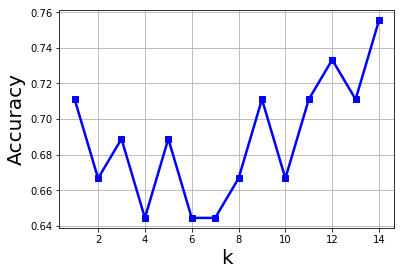

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
vscore = []
vk = []
for k in np.arange(1, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y= model.predict(test_x) # 0:Overcast, 2:Mild
    score = accuracy_score(pred_y, test_y)
    vscore.append(score)
    vk.append(k)
plt.plot(vk, vscore, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("k", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.show(True)

5. Calcular a matriz de confusão para avaliar a acurácia do classificador em questão. Você não deve utilizar rotinas prontas para isso. Você pode comparar o resultado da sua rotina com a da biblioteca do scikit-learn para avaliar a corretude do seu método.


In [64]:
 # Number of classes 
result =  np.zeros((3,3), dtype=int)

for i in np.arange(0,3):
        if test_y.item(i)==pred_y.item(i):
            if test_y.item(i)==1:
                result.item(0) += 1
            if test_y.item(i)==2:
                result.item(4) += 1
            else:
                result.item(8)+= 1
        else:
            if test_y.item(i)==1 and pred_y.item(i)==2:
                result.item(1) += 1
            if test_y.item(i)==2 and pred_y.item(i)==1:
                result.item(3)+= 1
            if test_y.item(i)==1 and pred_y.item(i)==3:
                result.item(2)+= 1
            if test_y.item(i)==3 and pred_y.item(i)==1:
                result.item(6)+= 1
            if test_y.item(i)==2 and pred_y.item(i)==3:
                result.item(5)+= 1
            if test_y.item(i)==3 and pred_y.item(i)==2:
                result.item(7)+= 1

SyntaxError: can't assign to function call (<ipython-input-64-219c2d268de4>, line 7)

In [102]:
frame = np.column_stack((pred_y, test_y))
frame[1]
for i in np.arange(0,45):
     certo1 = frame[frame[i] == 2]

C:\Users\Giovanna Zolin\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [16]:
#Matriz de confusão para verificar como a classificação foi feita.
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y, test_y)
pd.crosstab(pred_y, test_y, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,All
True,,,,
1,15,1,0,16
2,0,13,4,17
3,3,3,6,12
All,18,17,10,45


6. Responder: Por que o algoritmo de classificação KNN é conhecido como um algoritmo lazy?

Porque o algoritmo espera até o teste para realizar algum tipo de processamento, guardando todos os exemplos de treino na memória, e com isso, classifica os testes baseados nos exemplos de treino. Assim, se esforça pouco na etapa de aprendizado, sendo daí que vem o 'lazy', e acaba tendo que se esforçar mais na parte de classificação. 